In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
from impy import epos, common, sibyll
import numpy as np

In [2]:
import sys
sys.path.append('../ParticleDataTool/')

I forgot by how much the package is connected to MCVD (the MC running & data management framework). 
This file explains how to use the full interface for typical particle physics simulations.

Define initial event type, kinematics, etc. This can be changed later.

In [3]:
import eposlhc, sib23c
sibyll_run = sibyll.SibyllMCRun(
     # Initial event setup: energies, masses using a common.EventKinematics object
    event_kinematics=common.EventKinematics(ecm=5.02e3, nuc1_prop=(1,1), nuc2_prop=(16,8)),
    #String of the compiled f2py module
    libref=sib23c, 
    #Arbitrary label
    label='SIBYLL2.3c', 
    # Number of events to generate when calling start()
    n_events=10,
    #DEBUG level/verbosity
    DEBUG=True, 
    # Can be empty of no arguments supplied
    event_class=sibyll.SibyllMCEvent, 
    # event_config: Options which are passed to the event class that parses the FORTRAN COMMONs to numpy arrays
    event_config={'charged_only': True},
    # Settings to be applied during/before initializations
    default_settings=(None,None), 
    # Settings which can be changed on event-by-event basis. Settings classes are only tested with PHOJET and DPMJET. 
    settings=(None,None) 
)

In [4]:
sibyll_run.init_generator(None)#, datdir=(os.path.abspath('./iamdata/') + '/')) some models need files 

SibyllMCRun::init_generator(): Running outside of MCVD, the log will be printed to STDOUT.
SibyllCascadeRun::set_stable(): Setting standard particles stable.
SibyllCascadeRun::set_stable(): Setting conventional Sigma-, Xi0, Xi- and Lambda0 stable (decay mode).
SibyllMCRun::init_generator(): Using default settings: Settings
SibyllMCRun::set_stable(): defining  111 as stable particle, sid = 6


In [5]:
# Normal interaction p + N
sibyll_run.set_event_kinematics(common.EventKinematics(ecm=13e3, p1pdg=2212, nuc2_prop=(14,7)))

In [6]:
# Normal collider style energy
print sibyll_run.evkin
for i in range(3):
    sibyll_run.generate_event()
    event = sibyll.SibyllMCEvent(sib23c,event_config=sibyll_run.event_config)
    print 'Event', i + 1
    for pi, pt, et in zip(event.p_ids, event.pt, event.eta):
        print '{0:6}: pt: {1:5.2f} GeV  eta: {2:5.2f}'.format(pi, pt, et)

Event kinematics:
	ecm      : 13000.00000
	pcm      : 6499.99993
	elab     : 89997017.85095
	plab     : 89997017.85095
	gamma_cm : 6922.84760
	bgamm_cm : 6922.84753
	pdgid 1  :       2212
	nucprop 1: 1/1
	pdgid 2  :       2212
	nucprop 2: 14/7

Event 1
   211: pt:  0.96 GeV  eta:  3.66
  -321: pt:  0.37 GeV  eta:  5.38
  -321: pt:  0.76 GeV  eta:  4.92
 -2212: pt:  9.72 GeV  eta: -2.87
   211: pt:  2.16 GeV  eta: -3.07
  -321: pt:  0.71 GeV  eta: -2.18
   321: pt:  0.09 GeV  eta: -5.04
  2212: pt:  0.95 GeV  eta: -3.01
  -321: pt:  1.55 GeV  eta: -1.85
 -2212: pt:  0.23 GeV  eta: -3.50
 -2212: pt:  2.39 GeV  eta: -2.30
   211: pt:  2.02 GeV  eta: -0.03
  3222: pt:  1.26 GeV  eta:  4.77
  -211: pt:  1.17 GeV  eta:  2.27
  -211: pt:  1.30 GeV  eta: -0.24
 -3112: pt:  0.93 GeV  eta:  2.55
  -211: pt:  0.20 GeV  eta:  0.75
  2212: pt:  0.87 GeV  eta:  0.63
  -211: pt:  0.78 GeV  eta: -0.60
   211: pt:  0.68 GeV  eta:  1.99
   211: pt:  0.25 GeV  eta:  4.44
  -211: pt:  0.70 GeV  eta: -0.71

  -211: pt:  0.14 GeV  eta:  5.27
  -211: pt:  0.34 GeV  eta:  4.31
   211: pt:  0.09 GeV  eta:  1.03
  -211: pt:  0.33 GeV  eta:  1.37
  -211: pt:  0.26 GeV  eta: -7.01
  2212: pt:  0.43 GeV  eta:  6.74
   211: pt:  0.12 GeV  eta:  4.07
  -211: pt:  0.23 GeV  eta:  3.99
  -211: pt:  0.65 GeV  eta:  1.85
  -211: pt:  0.31 GeV  eta:  2.26
   211: pt:  1.29 GeV  eta:  0.31
  -211: pt:  0.46 GeV  eta:  0.13
   211: pt:  0.09 GeV  eta:  2.80
  -211: pt:  0.58 GeV  eta:  0.67
   211: pt:  0.15 GeV  eta: -1.76
  -211: pt:  0.14 GeV  eta: -1.84
  -211: pt:  0.48 GeV  eta: -5.89
   211: pt:  0.26 GeV  eta: -7.17
   211: pt:  0.12 GeV  eta:  3.17
  -211: pt:  0.13 GeV  eta:  3.27
  -321: pt:  0.24 GeV  eta:  4.43
   211: pt:  0.51 GeV  eta:  3.83
   321: pt:  0.27 GeV  eta:  3.30
  -211: pt:  0.20 GeV  eta:  4.29
   211: pt:  0.19 GeV  eta: -1.50
  -211: pt:  0.43 GeV  eta:  0.55
   211: pt:  0.20 GeV  eta: -0.81
  -211: pt:  0.29 GeV  eta: -1.42
  -321: pt:  0.27 GeV  eta: -5.08
   211: pt:  0

In [7]:
# Set certain particles to stable
sibyll_run.set_stable(321)
sibyll_run.set_stable(-321)
sibyll_run.set_stable(111)
#Enable readout of neutral particles
sibyll_run.event_config["charged_only"] = False

SibyllMCRun::set_stable(): defining  321 as stable particle, sid = 9
SibyllMCRun::set_stable(): defining  -321 as stable particle, sid = 10
SibyllMCRun::set_stable(): defining  111 as stable particle, sid = 6


In [8]:
# Cosmic ray interaction Fe + N (result is in center of mass frame)
sibyll_run.set_event_kinematics(common.EventKinematics(plab=1e11, nuc1_prop=(56,26), nuc2_prop=(14,7)))

In [9]:
print sibyll_run.evkin
for i in range(2):
    sibyll_run.generate_event()
    event = sibyll.SibyllMCEvent(sib23c,event_config=sibyll_run.event_config)
    print 'Event', i + 1
    print 'Number of secondaries:' , event.p_ids.shape  
    for pi, pt, et in zip(event.p_ids, event.pt, event.eta):
        print '{0:6}: pt: {1:5.2f} GeV  eta: {2:5.2f}'.format(pi, pt, et)
        

Event kinematics:
	ecm      : 433339.57168
	pcm      : 216669.78584
	elab     : 100000000000.00000
	plab     : 100000000000.00000
	gamma_cm : 230765.90862
	bgamm_cm : 230765.90862
	pdgid 1  :       2212
	nucprop 1: 56/26
	pdgid 2  :       2212
	nucprop 2: 14/7

Event 1
Number of secondaries: (68,)
  2212: pt:  0.31 GeV  eta: 13.80
   111: pt:  0.18 GeV  eta:  9.02
  -211: pt:  0.61 GeV  eta:  1.16
  -211: pt:  0.20 GeV  eta:  0.26
   211: pt:  0.84 GeV  eta:  0.18
  -211: pt:  0.67 GeV  eta: -0.62
   321: pt:  0.56 GeV  eta: -3.25
  -211: pt:  0.26 GeV  eta: -5.19
   211: pt:  0.72 GeV  eta: -3.42
   111: pt:  0.22 GeV  eta: -7.41
   111: pt:  0.57 GeV  eta: -10.30
   211: pt:  0.55 GeV  eta: -10.12
  2212: pt:  0.55 GeV  eta: -12.11
   211: pt:  0.99 GeV  eta:  1.49
   111: pt:  0.93 GeV  eta:  0.97
  -211: pt:  0.30 GeV  eta: -1.31
   211: pt:  0.60 GeV  eta: -0.56
  -211: pt:  0.82 GeV  eta: -0.88
  -211: pt:  0.12 GeV  eta: -5.75
   111: pt:  1.33 GeV  eta: -7.29
   211: pt:  0.23 

Histogramming is integded via the trigger formalism:
    
    The idea bhind triggers is as in collider simulations: define a condition which has to be satisfied to for triggering. 
    For example a certain, at least one particle in LHCb velo or particles in both hemispheres..
    
    Here we use a LHCb VELO as an example.

In [10]:
from impy.frontend import triggers
# Add a trigger with a label and the trigger object to the trigger dictionary
sibyll_run.triggers['LHCB_VELO'] = triggers.LHCb_VELO()

# Set simulation energy at 13 TeV pp
sibyll_run.set_event_kinematics(common.EventKinematics(ecm=13e3, p1pdg=2212, p2pdg=2212))

In [11]:
# To each trigger condition we can attach an arbitrary number of histograms which we want to fill
from impy.frontend import histograms, selectors
lhcb_velo_hlist = sibyll_run.triggers["LHCB_VELO"].histogram_list
lhcb_velo_hlist["pt_hist"] = histograms.Histogram(
    # Give it a name. Preferentiall the same as the key. Doesn't need to be unique as the name suggests.
    unique_name = 'pt_hist', 
    # Random title
    title='bla bla', 
    # Give an x range for the histogram
    x_range=(0,15), 
    # Tell which particles to select for fill
    # The selector below has min_pt = 0.1 and min_ptot = 2 GeV
    seldef=selectors.sel_etalims_minpt_ptot(2.,5.2), 
#     seldef=selectors.sel_all, 
    # Tell which variable to fill
    filldef=selectors.fillpt,
    # ...
    n_bins=40, 
    # How to scale the histogram when finalizing (can be some cross section). The default is 1/Nev
    scale=None, 
    # If bin the grid in log
    log_scale=False)

# Add eta histogram
lhcb_velo_hlist["eta_hist"] = histograms.Histogram(
    # Give it a name. Preferentiall the same as the key. Doesn't need to be unique as the name suggests.
    unique_name = 'eta_hist', 
    # Random title
    title='bla bla', 
    # Give an x range for the histogram
    x_range=(2.,5.2), 
    # Tell which particles to select for fill
    # The selector below has min_pt = 0.1 and min_ptot = 2 GeV
    seldef=selectors.sel_etalims_minpt_ptot(2.,5.2), 
#     seldef=selectors.sel_all, 
    # Tell which variable to fill
    filldef=selectors.filleta,
    # ...
    n_bins=40, 
    # How to scale the histogram when finalizing (can be some cross section). The default is 1/Nev
    scale=None, 
    # If bin the grid in log
    log_scale=False)

In [12]:
# You can also simulate CMS at the same time
sibyll_run.triggers['CMS_NSD'] = triggers.CMS_NSD()
cms_nsd_hlist = sibyll_run.triggers["CMS_NSD"].histogram_list
# Add eta histogram
cms_nsd_hlist["eta_hist"] = histograms.Histogram(
    # Give it a name. Preferentiall the same as the key. Doesn't need to be unique as the name suggests.
    unique_name = 'eta_hist', 
    # Random title
    title='bla bla', 
    # Give an x range for the histogram
    x_range=(-2.5,2.5), 
    # Tell which particles to select for fill
    seldef=selectors.sel_minpt(0.1), 
#     seldef=selectors.sel_all, 
    # Tell which variable to fill
    filldef=selectors.filleta,
    # ...
    n_bins=40, 
    # How to scale the histogram when finalizing (can be some cross section). The default is 1/Nev
    scale=None, 
    # If bin the grid in log
    log_scale=False)

In [13]:
sibyll_run.n_events = 10000
sibyll_run.start()

running start()
running start_fixed()
SibyllMCRun::start_fixed(): starting generation of 10000 events
Event kinematics:
	ecm      : 13000.00000
	pcm      : 6499.99993
	elab     : 90059364.57523
	plab     : 90059364.57523
	gamma_cm : 6927.64350
	bgamm_cm : 6927.64343
	pdgid 1  :       2212
	nucprop 1: 1/1
	pdgid 2  :       2212
	nucprop 2: 1/1



...completed 0.00\% of the events have been rejected.
No logging facility defined.


100% |##########################################################| Time: 0:00:10


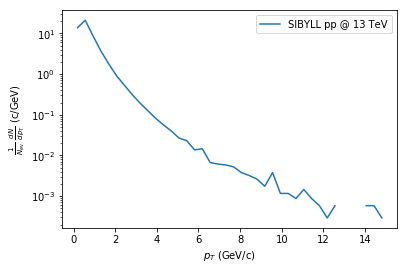

In [14]:
plt.figure()
plt.semilogy(lhcb_velo_hlist["pt_hist"].x_center_values, 
             lhcb_velo_hlist["pt_hist"].run_hist_values, label=r'SIBYLL pp @ 13 TeV')
plt.xlabel(r'$p_T$ (GeV/c)')
plt.ylabel(r'$\frac{1}{N_{ev}}$ $\frac{dN}{dp_T}$ (c/GeV)')
plt.legend()

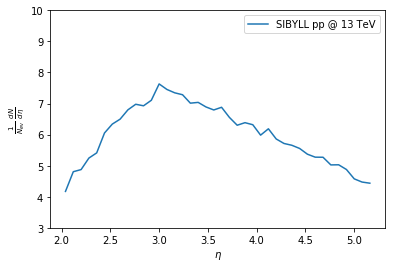

In [15]:
plt.figure()
plt.plot(lhcb_velo_hlist["eta_hist"].x_center_values, 
         lhcb_velo_hlist["eta_hist"].run_hist_values, label=r'SIBYLL pp @ 13 TeV')
plt.xlabel(r'$\eta$')
plt.ylabel(r'$\frac{1}{N_{ev}}$ $\frac{dN}{d\eta}$')
plt.ylim(3,10)
plt.legend()

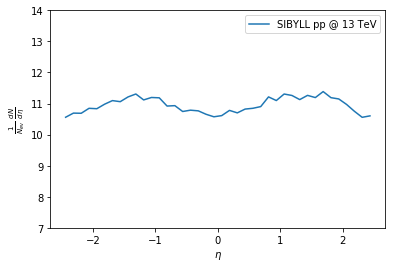

In [16]:
plt.figure()
plt.plot(cms_nsd_hlist["eta_hist"].x_center_values, 
         cms_nsd_hlist["eta_hist"].run_hist_values, label=r'SIBYLL pp @ 13 TeV')
plt.xlabel(r'$\eta$')
plt.ylabel(r'$\frac{1}{N_{ev}}$ $\frac{dN}{d\eta}$')
plt.ylim(7,14)
plt.legend()